In [12]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/Volumes/Transcend/gwu_course/project/Consumer_Complaints.csv')
data.shape

(875844, 18)

In [3]:
data.columns = ['Date_received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer_complaint_narrative', 'Company_public_response', 'Company',
       'State', 'ZIP_code', 'Tags', 'Consumer_consent_provided',
       'Submitted_via', 'Date_sent_to_company', 'Company_response_to_consumer',
       'Timely_response', 'Consumer_disputed', 'Complaint_ID']

In [4]:
data.head(3)

,Date_received,Product,Sub-product,Issue,Sub-issue,Consumer_complaint_narrative,Company_public_response,Company,State,ZIP_code,Tags,Consumer_consent_provided,Submitted_via,Date_sent_to_company,Company_response_to_consumer,Timely_response,Consumer_disputed,Complaint_ID
0,03/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,03/17/2014,Closed with explanation,Yes,No,759217
1,10/01/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10/05/2016,Closed with explanation,Yes,No,2141773
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/2016,Closed with explanation,Yes,No,2163100


### Label

In [5]:
label = pd.DataFrame(data.Timely_response.value_counts())
label['Timely_response_rate'] = label.Timely_response/data.shape[0]

base = 0.972434

label

,Timely_response,Timely_response_rate
Yes,851751,0.972492
No,24093,0.027508


In [6]:
data.Timely_response[data.Timely_response == 'Yes'] = 1
data.Timely_response[data.Timely_response == 'No'] = 0

data.Timely_response = data.Timely_response.astype('int')

---

### Missing Values

In [8]:
na = pd.DataFrame(data.isnull().sum())
na.columns = ['na']
na['na%'] = na.na/data.shape[0]
#na = na.sort(columns='na%', ascending=False)
na

,na,na%
Date_received,0,0.000000
Product,0,0.000000
Sub-product,235160,0.268495
Issue,0,0.000000
Sub-issue,472881,0.539915
Consumer_complaint_narrative,690756,0.788675
Company_public_response,631550,0.721076
Company,0,0.000000
State,11396,0.013011
ZIP_code,11445,0.013067


In [9]:
consent = data.Consumer_consent_provided
#consent.value_counts()

In [10]:
tag = data.Tags
#tag.value_counts()

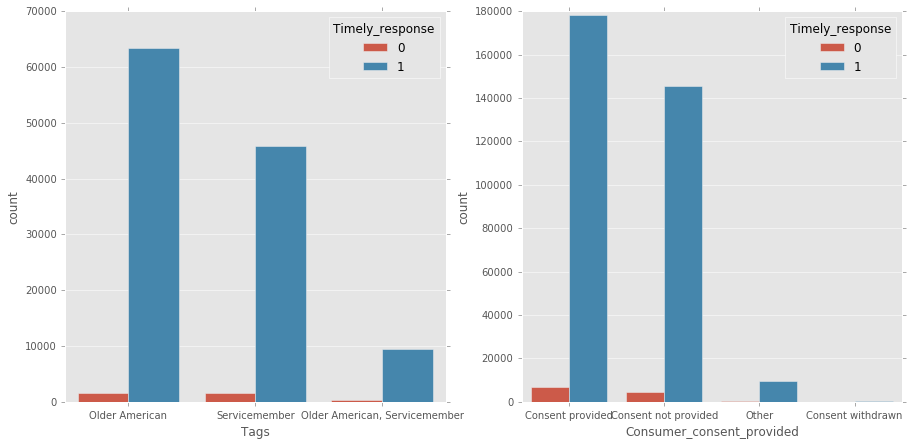

In [13]:
data_tag = data[-tag.isnull()]
data_consent = data[-consent.isnull()]

fig, ax = plt.subplots(1, 2, figsize = (15,7))

sns.countplot('Tags',hue='Timely_response',data=data_tag,ax=ax[0])
sns.countplot('Consumer_consent_provided', hue='Timely_response',data=data_consent,ax=ax[1])
plt.show()

Tags don't make any difference to timely response so dose Consumer_consent_provided. So they are not significant. Just delete these columns.

In [11]:
data_tag[['Tags', 'Timely_response']].groupby('Tags').mean()

,Timely_response
Tags,
Older American,0.976469
"Older American, Servicemember",0.972337
Servicemember,0.964778


In [12]:
data_consent[['Consumer_consent_provided', 'Timely_response']].groupby('Consumer_consent_provided').mean()

,Timely_response
Consumer_consent_provided,
Consent not provided,0.969455
Consent provided,0.962594
Consent withdrawn,0.979070
Other,0.974870


In [13]:
'''
subissue = data[['Sub-issue','Timely_response']].groupby('Sub-issue').mean()
subissue_cnt = data['Sub-issue'].value_counts()
subissue['cnt%'] = subissue_cnt

subissue.sort('Timely_response',ascending=False)
'''

"\nsubissue = data[['Sub-issue','Timely_response']].groupby('Sub-issue').mean()\nsubissue_cnt = data['Sub-issue'].value_counts()\nsubissue['cnt%'] = subissue_cnt\n\nsubissue.sort('Timely_response',ascending=False)\n"

---------

### Product & Sub-product

In [14]:
#data.Product.value_counts()

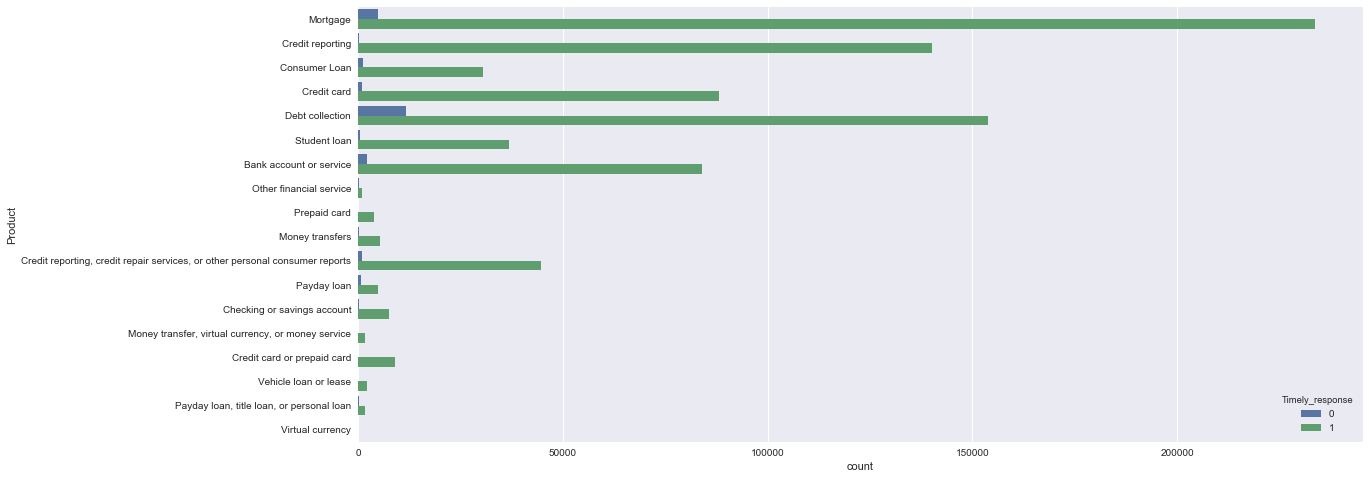

In [15]:
f,ax=plt.subplots(figsize=(18,8))
sns.countplot(y = 'Product',hue='Timely_response',data=data)
plt.show()

In [16]:
tr_product = pd.DataFrame(data[['Product','Timely_response']].groupby(['Product']).mean())
tr_product['over_avg'] = tr_product.Timely_response / 0.972434
tr_product.sort('Timely_response',ascending=False)

,Timely_response,over_avg
Product,,
Credit reporting,0.997864,1.026150
Credit card or prepaid card,0.993183,1.021337
Credit card,0.988990,1.017025
Student loan,0.987029,1.015009
Prepaid card,0.986908,1.014884
Checking or savings account,0.986804,1.014777
"Money transfer, virtual currency, or money service",0.985714,1.013657
"Credit reporting, credit repair services, or other personal consumer reports",0.981926,1.009761
Mortgage,0.979335,1.007096


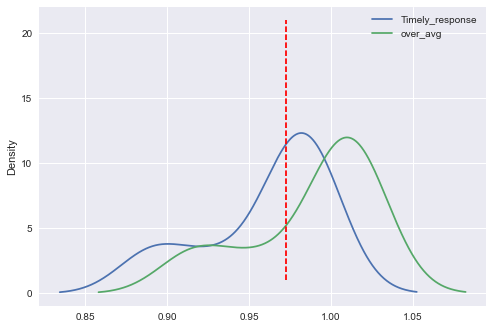

In [17]:
tr_product.plot.density()

yy = np.linspace(1,21,200)
tr_base = np.array([0.972434 for i in range(len(yy))])
plt.plot(tr_base, yy, 'r--')


plt.show()

Sub-product

In [18]:
subprod = pd.DataFrame(data[['Sub-product','Timely_response']].groupby(['Sub-product']).mean())
subprod.Timely_response = subprod.Timely_response/base
subprod_cnt = data['Sub-product'].value_counts()/len(data['Sub-product'])
subprod['cnt%'] = subprod_cnt

subprod.sort(columns='Timely_response',ascending=False)

,Timely_response,cnt%
Sub-product,,
Electronic Benefit Transfer / EBT card,1.028347,0.000014
Government benefit card,1.028347,0.000127
Gift card,1.028347,0.000049
Check cashing service,1.028347,0.000042
Virtual currency,1.025676,0.000442
Mobile or digital wallet,1.025164,0.000370
General-purpose credit card or charge card,1.022395,0.007927
Home equity loan or line of credit (HELOC),1.021864,0.000910
Store credit card,1.021622,0.001754


In [19]:
#notknow = data[data['Sub-product'] == 'I do not know']
#notknow.Product.value_counts()

In [20]:
#debtc = data[data.Product == 'Debt collection']
#debtc['Sub-product'].value_counts()

The missing values in Sub-product are all from Credit reporting, Credit card or Payday loan. And we could find out that these 3 products don't have sub-product. So we can just assign their sub-product as the same as products.

In [21]:
subpnull = data[data['Sub-product'].isnull()]
subpnull = pd.DataFrame(subpnull.Product.value_counts())
subpnull

,Product
Credit reporting,140424
Credit card,89190
Payday loan,5546


In [22]:
fill_subprod_as_prod = list(subpnull.index)

---

### Issue

There are 166 knds of issues. A little bit much but acceptable.

In [23]:
pd.DataFrame(data.Issue.value_counts()).shape

(166, 1)

In [24]:
iss = pd.DataFrame(data[['Issue','Timely_response']].groupby(['Issue']).mean())
iss = iss.sort(columns='Timely_response',ascending=False)
iss

,Timely_response
Issue,
Problem with cash advance,1.000000
Lender damaged or destroyed vehicle,1.000000
Problem with an overdraft,1.000000
Convenience checks,1.000000
Problem with credit report or credit score,1.000000
Problem with overdraft,1.000000
Property was damaged or destroyed property,1.000000
Property was sold,1.000000
"Overdraft, savings, or rewards features",1.000000


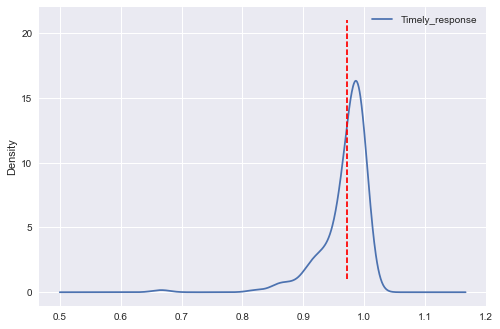

In [25]:
iss.plot.density()

yy = np.linspace(1,21,200)
tr_base = np.array([0.972434 for i in range(len(yy))])
plt.plot(tr_base, yy, 'r--')

plt.show()

Sub-issue

In [26]:
subissnull = pd.DataFrame(data[data['Sub-issue'].isnull()].Issue.value_counts())
subissnull.columns = ['null_subIssue']
subisn_index = list(subissnull.index)

In [27]:
issue = pd.DataFrame(data.Issue.value_counts())
issue = pd.concat([subissnull, issue], axis = 1)

In [28]:
issue['fillIssue'] = issue.null_subIssue - issue.Issue
issue = issue.fillna(0)

In [29]:
fill_subissue_as_other = list(issue[issue.fillIssue != 0].index)
fill_subissue_as_issue = list(issue[issue.fillIssue == 0].index)

---

### Company

4409 is too much..

In [30]:
pd.DataFrame(data.Company.value_counts()).shape

(4409, 1)

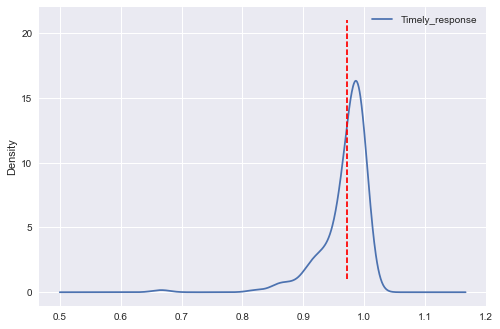

In [31]:
cmpy = pd.DataFrame(data[['Company','Timely_response']].groupby(['Company']).mean())
cmpy = iss.sort(columns='Timely_response',ascending=False)

cmpy.plot.density()

yy = np.linspace(1,21,200)
tr_base = np.array([0.972434 for i in range(len(yy))])
plt.plot(tr_base, yy, 'r--')


plt.show()

---

### State

In [32]:
stt = pd.DataFrame(data[['State','Timely_response']].groupby(['State']).mean())
stt = stt.sort(columns='Timely_response',ascending=False)
stt

,Timely_response
State,
AA,1.000000
FM,1.000000
PW,1.000000
AS,1.000000
VI,0.990000
PR,0.983110
CT,0.979951
NY,0.979669
MA,0.979106


---

### Submitted_via

Web            609082
Referral       140068
Phone           56764
Postal mail     53938
Fax             11671
Email             350
Name: Submitted_via, dtype: int64


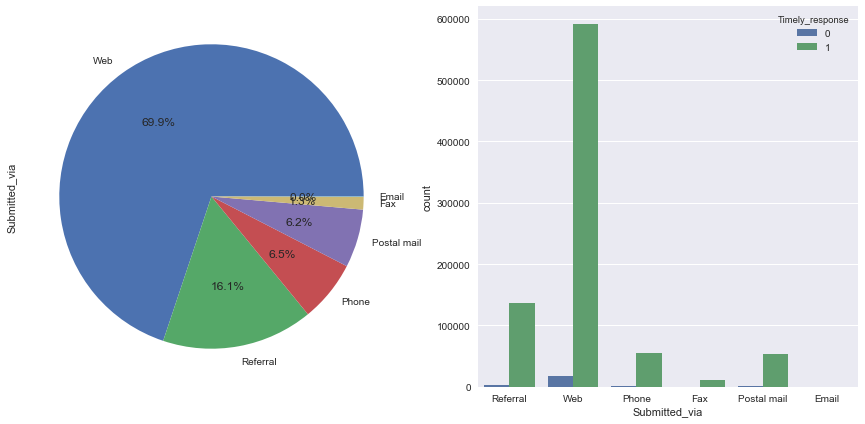

In [33]:
print(data.Submitted_via.value_counts())

f,ax=plt.subplots(1,2,figsize=(15,7))

data.Submitted_via.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0])
sns.countplot('Submitted_via',hue='Timely_response',data=data,ax=ax[1])

plt.show()

In [34]:
tr_submit = pd.DataFrame(data[['Submitted_via','Timely_response']].groupby(['Submitted_via']).mean())
tr_submit['over_avg'] = tr_submit.Timely_response / 0.972434
tr_submit

,Timely_response,over_avg
Submitted_via,,
Email,0.971429,0.998966
Fax,0.974981,1.002619
Phone,0.968572,0.996028
Postal mail,0.981627,1.009454
Referral,0.979539,1.007306
Web,0.970298,0.997803


---

### Company_response_to_consumer

Closed with explanation            660431
Closed with non-monetary relief    105064
Closed with monetary relief         55588
Closed without relief               17868
Closed                              17611
In progress                          5586
Closed with relief                   5304
Untimely response                    4421
Name: Company_response_to_consumer, dtype: int64


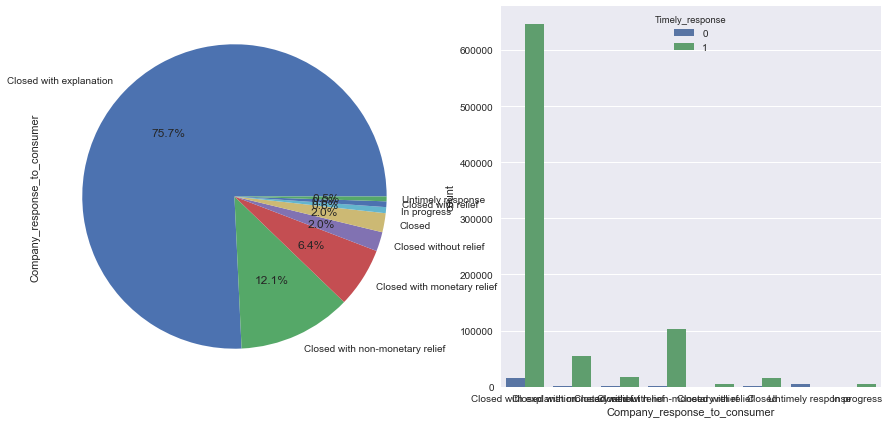

In [35]:
print(data.Company_response_to_consumer.value_counts())

f,ax=plt.subplots(1,2,figsize=(15,7))

data.Company_response_to_consumer.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0])
sns.countplot('Company_response_to_consumer',hue='Timely_response',data=data,ax=ax[1])

plt.show()

In [36]:
tr_c2c = pd.DataFrame(data[['Company_response_to_consumer','Timely_response']].groupby(['Company_response_to_consumer']).mean())
tr_c2c['over_avg'] = tr_c2c.Timely_response / 0.972434
tr_c2c

,Timely_response,over_avg
Company_response_to_consumer,,
Closed,0.901141,0.926686
Closed with explanation,0.977466,1.005175
Closed with monetary relief,0.985123,1.013048
Closed with non-monetary relief,0.986075,1.014028
Closed with relief,0.965498,0.992867
Closed without relief,0.971122,0.998650
In progress,0.999821,1.028163
Untimely response,0.000000,0.000000


---

### Consumer Disputed

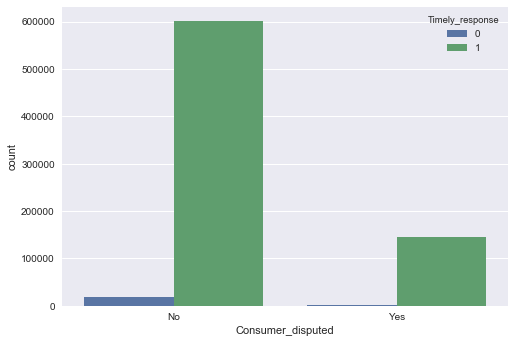

In [37]:
sns.countplot('Consumer_disputed',hue='Timely_response',data=data)
plt.show()

In [38]:
tr_disp = pd.DataFrame(data[['Consumer_disputed','Timely_response']].groupby(['Consumer_disputed']).mean())
tr_disp['over_avg'] = tr_disp.Timely_response / 0.972434
tr_disp

,Timely_response,over_avg
Consumer_disputed,,
No,0.969160,0.996634
Yes,0.982679,1.010536


### - Dealing with missing values

Delete features that have too much NAs.

In [39]:
xcol = list(na[na['na%'] > 0.6].index)
data = data.drop(xcol, 1)

In [40]:
na = pd.DataFrame(data.isnull().sum())
na.columns = ['na']
na['na%'] = na.na/data.shape[0]

For now just delete Sub-issue and Sub-prod. If needed, we could fill Sub-issue with Other or Issue, and fill Sub-prod with Prod.

In [41]:
xcol = list(na[(na['na%'] > 0.2)].index)
data = data.drop(xcol, 1)

Fill NAs in Consumer_disputed as -1. And label 1 to Yes, 0 to No.

In [42]:
data.Consumer_disputed[data.Consumer_disputed == 'Yes'] = 1
data.Consumer_disputed[data.Consumer_disputed == 'No'] = 0
data.Consumer_disputed[data.Consumer_disputed.isnull()] = -1

Just delete NA rolls in ZIP_code and State.

In [43]:
data = data.dropna()
data.shape

(860606, 12)

In [44]:
na = pd.DataFrame(data.isnull().sum())
na.columns = ['na']
na['na%'] = na.na/data.shape[0]
na = na.sort(columns='na%', ascending=False)
na

,na,na%
Date_received,0,0.0
Product,0,0.0
Issue,0,0.0
Company,0,0.0
State,0,0.0
ZIP_code,0,0.0
Submitted_via,0,0.0
Date_sent_to_company,0,0.0
Company_response_to_consumer,0,0.0
Timely_response,0,0.0


### Change Data Type

In [45]:
data.Consumer_disputed = data.Consumer_disputed.astype('int')
data.Timely_response = data.Timely_response.astype('int')

In [46]:
pd.DataFrame(data.dtypes)

,0
Date_received,object
Product,object
Issue,object
Company,object
State,object
ZIP_code,object
Submitted_via,object
Date_sent_to_company,object
Company_response_to_consumer,object
Timely_response,int64


In [66]:
data.to_csv('./cleaned_1.csv')

### Time Series Analysis

In [55]:
data.head(3)

,Date_received,Product,Issue,Company,State,ZIP_code,Submitted_via,Date_sent_to_company,Company_response_to_consumer,Timely_response,Consumer_disputed,Complaint_ID
151623,2011-12-01,Credit card,Credit reporting,CAPITAL ONE FINANCIAL CORPORATION,AZ,85704,Referral,2011-12-01,Closed without relief,1,0,2051
607185,2011-12-01,Credit card,Rewards,"CITIBANK, N.A.",OH,45415,Referral,2011-12-01,Closed with relief,0,0,2063
364788,2011-12-01,Credit card,APR or interest rate,SYNCHRONY FINANCIAL,NJ,08087,Web,2011-12-01,Closed with relief,1,0,2105


In [49]:
data.Date_received = pd.to_datetime(data.Date_received)

In [50]:
data.Date_sent_to_company = pd.to_datetime(data.Date_sent_to_company)

In [54]:
data = data.sort('Date_received',ascending=True)

In [69]:
data.dtypes

Date_received                   datetime64[ns]
Product                                 object
Issue                                   object
Company                                 object
State                                   object
ZIP_code                                object
Submitted_via                           object
Date_sent_to_company            datetime64[ns]
Company_response_to_consumer            object
Timely_response                          int64
Consumer_disputed                        int64
Complaint_ID                             int64
dtype: object